# 04_Modeling_IF.ipynb - Isolation Forest for Fake Job Detection

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Load and filter real (legit) job posts
df = pd.read_csv('../fake_job_postings.csv')
df['description'] = df['description'].fillna("")
df_real = df[df['fraudulent'] == 0]

In [5]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_real = tfidf.fit_transform(df_real['description'])

In [6]:
# Train Isolation Forest
iso_model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_model.fit(X_real)

IsolationForest(contamination=0.05, random_state=42)

In [7]:
# Predict on all job posts
X_all = tfidf.transform(df['description'])
preds = iso_model.predict(X_all)
df['iso_pred'] = [0 if p == 1 else 1 for p in preds]

In [8]:
# Evaluation
cm = confusion_matrix(df['fraudulent'], df['iso_pred'])
print("Confusion Matrix:\n", cm)
print(classification_report(df['fraudulent'], df['iso_pred']))

Confusion Matrix:
 [[16163   851]
 [  827    39]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17014
           1       0.04      0.05      0.04       866

    accuracy                           0.91     17880
   macro avg       0.50      0.50      0.50     17880
weighted avg       0.91      0.91      0.91     17880



In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(df['fraudulent'], df['iso_pred']))

Accuracy: 0.9061521252796421


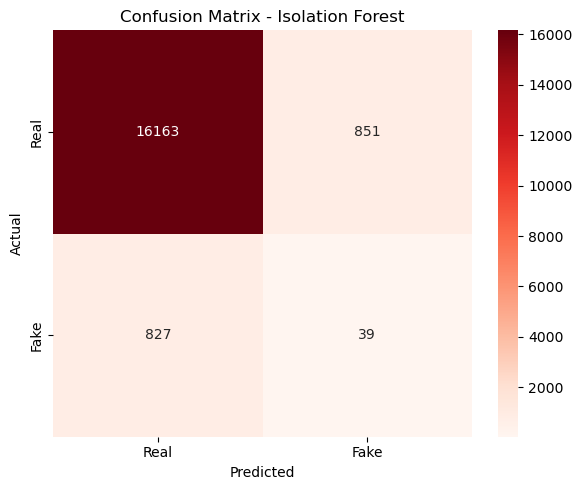

In [9]:
# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [10]:
# Save model and vectorizer
joblib.dump(iso_model, '../models/isolation_forest_model.pkl')
joblib.dump(tfidf, '../models/isolation_forest_vectorizer.pkl')

['../models/isolation_forest_vectorizer.pkl']